In [1]:
import gpflow
from src.utils import create_dataset, plot_matrix, kfold_cv_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from src.models.kernels import LambdaRBF
from src.models.models import GPRLasso

2023-04-12 16:23:31.514370: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Dataset: Yacht

In [12]:
X, Y = create_dataset('boston', 0, False)
D = X.shape[1]

name,class,transform,prior,trainable,shape,dtype,value
GPRLasso.kernel.L,Parameter,Identity,,True,"(91,)",float64,"[0.27735, 0., 0...."
GPRLasso.kernel.variance,Parameter,Softplus,,True,(),float64,1.0
GPRLasso.likelihood.variance,Parameter,Softplus + Shift,,True,(),float64,1.0


Test RMSE (Standardised): 1.587


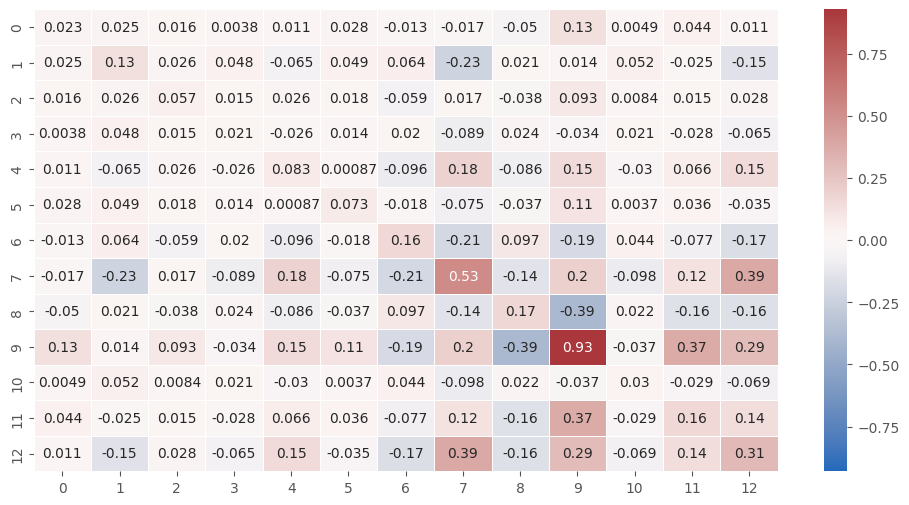

In [13]:
LRBF = LambdaRBF(variance=1.0, randomized=False, d=D)
gpr_lasso_LRBF = GPRLasso(data=(X, Y), kernel=LRBF, lasso=0)
gpflow.utilities.print_summary(gpr_lasso_LRBF, fmt="notebook")
gpr_lasso_LRBF.train()
plot_matrix(gpr_lasso_LRBF.kernel.precision())
y_test_pred, _ = gpr_lasso_LRBF.predict_f(X)
test_rmse_stan = mean_squared_error(Y, y_test_pred, squared=False)
print('Test RMSE (Standardised): %.3f'%(test_rmse_stan))

In [14]:
X, Y = create_dataset('kin8nm', 0, False)

In [15]:
kfolds = KFold(n_splits = 8, shuffle=True)
model_params = {'num_inducing': 100, 'likelihood': gpflow.likelihoods.Gaussian(), 'max_iter': 10000, 'minibatch_size': 1000, 'lasso': 0}
results_RBF = kfold_cv_model(model='GPR-Lasso', X=X, Y=Y, kernel='LRBF', k_folds=kfolds, model_params=model_params, iprint=True)